In [1]:
# !git clone https://github.com/gregorLen/AnfisTensorflow2.0.git

In [2]:
cd AnfisTensorflow2.0/

/home/can/Desktop/lectures/ML Tasks/Task 4/AnfisTensorflow2.0


## Import

In [3]:
from Models import myanfis
import tensorflow as tf

import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
# from sklearn.metrics import accuracy_score

# import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [4]:
cd ..

/home/can/Desktop/lectures/ML Tasks/Task 4


In [5]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
scaler = StandardScaler()

df2 = df.copy()

df2['free sulfur dioxide'] = scaler.fit_transform(df2[['free sulfur dioxide']])
df2['density'] = scaler.fit_transform(df2[['density']])
df2['quality'] = scaler.fit_transform(df2[['quality']])

In [7]:
X = df2.iloc[:-199,[1,7]]
Y = df2.iloc[:-199,-1]

x = df2.iloc[-199:,[1,7]]
y = df2.iloc[-199:,-1]

In [8]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Scale dataset

In [9]:
param = myanfis.fis_parameters(
        n_input = 2,                
        n_memb = 2,                 
        batch_size = 5,            
        memb_func = 'gaussian',      
        optimizer = 'sgd',          
        loss = tf.keras.losses.MeanAbsoluteError(),               
        n_epochs = 20               
        )

In [10]:
kfold = KFold(n_splits=2)
histories = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    fis = myanfis.ANFIS(n_input = param.n_input,
                    n_memb = param.n_memb,
                    batch_size = param.batch_size,
                    memb_func = param.memb_func,
                    name = 'firstAnfis' # buradaki ismi değiştirin
                    )

    fis.model.compile(optimizer=param.optimizer,
                      loss=param.loss,
                      metrics=['mae']  # ['mae', 'mse']
                      )

    history = fis.fit(X_train, Y_train,
                  epochs=param.n_epochs,
                  batch_size=param.batch_size,
                  validation_data = (X_test, Y_test),
                  )
    histories.append(history)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/20
140/140 [==============================] - 2s 5ms/step - loss: 0.7460 - mae: 0.7460 - val_loss: 0.9445 - val_mae: 0.9445
Epoch 2/20
140/140 [==============================] - 0s 2ms/step - loss: 0.7624 - mae: 0.7624 - val_loss: 0.9147 - val_mae: 0.9147
Epoch 3/20
140/140 [==============================] - 0s 2ms/step - loss: 0.7261 - mae: 0.7261 - val_loss: 0.8868 - val_mae: 0.8868
Epoch 4/20
140/140 [==============================] - 0s 3ms/step - loss: 0.7187 - mae: 0.7187 - val_loss: 0.8741 - val_mae: 0.8741
Epoch 5/20
140/140 [==============================] - 0s 2ms/step - loss: 0.7113 - mae: 0.7113 - val_loss: 0.8663 - val_mae: 0.8663
Epoch 6/20
140/140 [====================

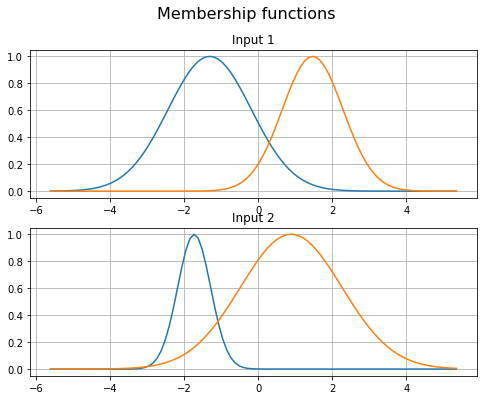

In [11]:
fis.plotmfs()

In [12]:
param = myanfis.fis_parameters(
        n_input = 2,                
        n_memb = 2,                 
        batch_size = 5,            
        memb_func = 'gaussian',      
        optimizer = 'sgd',          
        loss = tf.keras.losses.MeanAbsoluteError(),               
        n_epochs = 20               
        )

kfold = KFold(n_splits=2)
histories = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    fis = myanfis.ANFIS(n_input = param.n_input,
                    n_memb = param.n_memb,
                    batch_size = param.batch_size,
                    memb_func = param.memb_func,
                    name = 'firstAnfis' # buradaki ismi değiştirin
                    )

    fis.model.compile(optimizer=param.optimizer,
                      loss=param.loss,
                      metrics=['mae']  # ['mae', 'mse']
                      )

    history = fis.fit(X_train, Y_train,
                  epochs=param.n_epochs,
                  batch_size=param.batch_size,
                  validation_data = (X_test, Y_test),
                  )
    histories.append(history)

Epoch 1/20
140/140 [==============================] - 1s 3ms/step - loss: 1.1655 - mae: 1.1655 - val_loss: 1.0376 - val_mae: 1.0376
Epoch 2/20
140/140 [==============================] - 0s 3ms/step - loss: 0.8541 - mae: 0.8541 - val_loss: 0.9496 - val_mae: 0.9496
Epoch 3/20
140/140 [==============================] - 0s 3ms/step - loss: 0.8317 - mae: 0.8317 - val_loss: 0.9115 - val_mae: 0.9115
Epoch 4/20
140/140 [==============================] - 0s 2ms/step - loss: 0.7969 - mae: 0.7969 - val_loss: 0.9254 - val_mae: 0.9254
Epoch 5/20
140/140 [==============================] - 0s 3ms/step - loss: 0.7686 - mae: 0.7686 - val_loss: 0.9036 - val_mae: 0.9036
Epoch 6/20
140/140 [==============================] - 0s 3ms/step - loss: 0.7517 - mae: 0.7517 - val_loss: 0.8955 - val_mae: 0.8955
Epoch 7/20
140/140 [==============================] - 0s 3ms/step - loss: 0.7645 - mae: 0.7645 - val_loss: 0.8895 - val_mae: 0.8895
Epoch 8/20
140/140 [==============================] - 0s 3ms/step - loss: 0.

<AxesSubplot:>

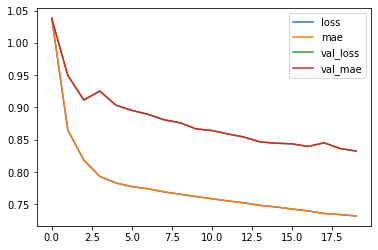

In [13]:
pd.DataFrame(histories[0].history).plot()

<AxesSubplot:>

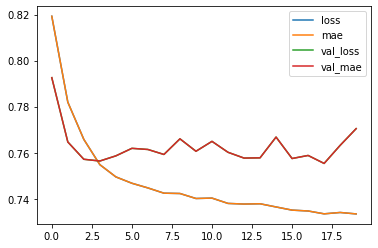

In [14]:
pd.DataFrame(histories[1].history).plot()